In [1]:
# run this to shorten the data import from the files
import os
cwd = os.path.dirname(os.getcwd())+'/'
path_data = os.path.join(os.path.dirname(os.getcwd()), 'datasets/')


# Setting up problems

You're testing for a disease and advertising that the test is 99% accurate; that is if you have the disease, you will test positive 99% of the time, and if you don't have the disease, you will test negative 99% of the time. Let's say that 1% of all people have the disease and someone tests positive. What's the probability that the person has the disease? Select the correct set up for this problem.

    (.99 * .01) / .01

    (.99 * .99) / (.01 * .99)

    (.99 * .01) / ((.09 * .99)+(.99 * .01)) {Answer}

    ((.01 * .99) + (.99 * .01)) / (.99 * .01)

**Correct! If you follow through with this computation, you get the result that our patient has a 50% probability of having the disease, given that they tested positive.**

In [9]:
# exercise 01

"""
Bayes' theorem applied

Let's actually solve out a pretty straightforward, yet typical Bayes' theorem interview problem. You have two coins in your hand. Out of the two coins, one is a real coin (heads and tails) and the other is a faulty coin with tails on both sides.

You are blindfolded and forced to choose a random coin and then toss it in the air. The coin lands with tails facing upwards. Find the probability that this is the faulty coin.
"""

# Instructions

"""


    Print the probability of the coin landing tails. P(T)

    Print the probability of the coin being faulty. P(F)

    Print the probability of the coin being faulty and landing tails. P(F|T)

    Print and solve for the probability that the coin is faulty, given it came down on tails.

"""

# solution

P_F = 1/2 # prob fulty
P_R = 1/2 # prob real

P_TF = 1 # prob tails given faulty
P_TR = 1/2 # prob tails given real

# calculating P_T

P_T = (P_TF * P_F) + (P_TR * P_R)


# prob of being faulty and tails P(F|T)
P_FT = (P_TF * P_F)/ P_T

# Print values
print(f'prob faulty = {P_F}')
print(f'prob real = {P_R}', end='\n\n')

print(f'prob tails given faulty = {P_TF}')
print(f'prob tails given real = {P_TR}', end='\n\n')

print(f'prob of chosing a coin and landing on tails = {P_T}')
print(f'prob faulty and tails = {P_FT}')

#----------------------------------#

# Conclusion

"""

"""

prob faulty = 0.5
prob real = 0.5

prob tails given faulty = 1
prob tails given real = 0.5

prob of chosing a coin and landing on tails = 0.75
prob faulty and tails = 0.6666666666666666


'\n\n'

In [18]:
# exercise 02

"""
Samples from a rolled die

Let's work through generating a simulation using the numpy package. You'll work with the same scenario from the slides, simulating rolls from a standard die numbered 1 through 6, using the randint() function. Take a look at the documentation for this function if you haven't encountered it before.

Starting with a small sample and working your way up to a larger sample, examine the outcome means and come to a conclusion about the underlying theorem.
"""

# Instructions

"""

    Generate a sample of 10 die rolls using the randint() function; assign it to our small variable.
    Assign the mean of the sample to small_mean and print the results; notice how close it is to the true mean.
    Similarly, create a larger sample of 1000 die rolls and assign the list to our large variable.
    Assign the mean of the larger sample to large_mean and print the mean; which theorem is at work here?

"""

# solution

from numpy.random import randint

# Create a sample of 10 die rolls
small = randint(1, 7, 10)

# Calculate and print the mean of the sample
small_mean = small.mean()
print(small_mean)

# Create a sample of 1000 die rolls
large = randint(1, 7, 1000)

# Calculate and print the mean of the large sample
large_mean = large.mean()
print(large_mean)

#----------------------------------#

# Conclusion

"""
Good job! Notice how the mean of the large sample has gotten closer to the true expected mean value of 3.5 for a rolled die. Which theorem did you say was being demonstrated here? Was it the law of large numbers? If so, you're correct! It's important to distinguish between the law of large numbers and central limit theorem in interviews.
"""

3.6
3.592


"\nGood job! Notice how the mean of the large sample has gotten closer to the true expected mean value of 3.5 for a rolled die. Which theorem did you say was being demonstrated here? Was it the law of large numbers? If so, you're correct! It's important to distinguish between the law of large numbers and central limit theorem in interviews.\n"

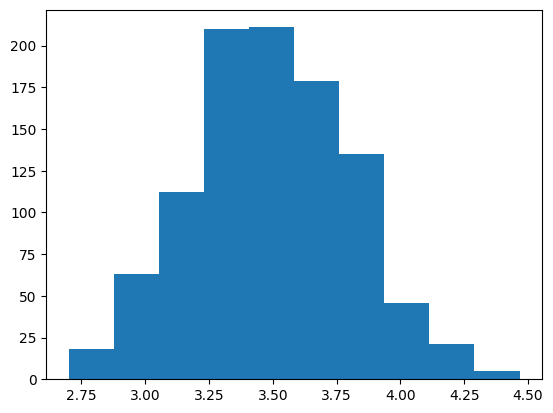

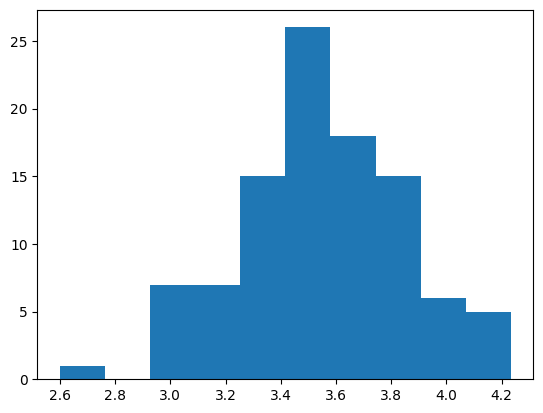

"\nNice! Note how whether we took 100 or 1000 sample means, the distribution was still approximately normal. This will always be the case when we have a large enough sample (typically above 30). That's the central limit theorem at work. Remember why it's so important. It serves as the basis for all statistical experiments that you'll do!\n"

In [19]:
# exercise 03

"""
Simulating central limit theorem

Now that we have some practice creating a sample, we'll look at simulating the central limit theorem, similar to what you saw in the slides. We'll also continue dealing with a standard die numbered 1 through 6.

In order to do this, you'll take a collection of sample means from numpy and examine the distribution of them using the matplotlib package, which has been imported as plt for the rest of the chapter.
"""

# Instructions

"""
Create a list named means with 1000 sample means from samples of 30 rolled dice by using list comprehension.
---
Create and show a histogram of the means using the hist() function; examine the shape of the distribution.
---
Adapt your code to visualize only 100 samples in the means list; did the distribution change at all?
"""

# solution

from numpy.random import randint
import matplotlib.pyplot as plt

# Create a list of 1000 sample means of size 30
means = [randint(1, 7, 30).mean() for i in range(1000)]

# Create and show a histogram of the means
plt.hist(means)
plt.show()

#----------------------------------#

# Adapt code for 100 samples of size 30
means = [randint(1, 7, 30).mean() for i in range(100)]

# Create and show a histogram of the means
plt.hist(means)
plt.show()

#----------------------------------#

# Conclusion

"""
Nice! Note how whether we took 100 or 1000 sample means, the distribution was still approximately normal. This will always be the case when we have a large enough sample (typically above 30). That's the central limit theorem at work. Remember why it's so important. It serves as the basis for all statistical experiments that you'll do!
"""

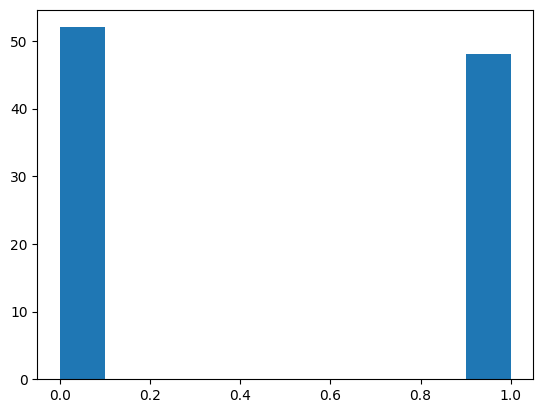

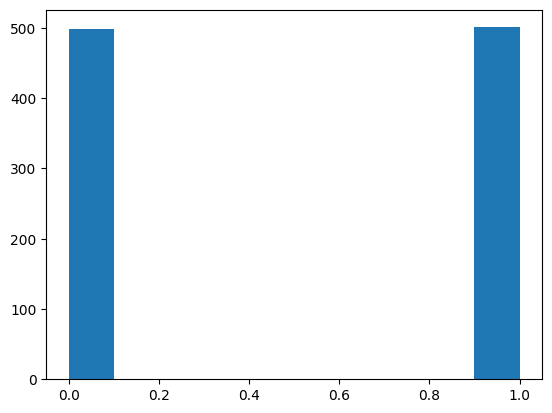

"\nGood job! Notice that heads and tails didn't have the exact same probability with a sample size of just 100. This is no fluke — when sampling, we won't always get perfect results. We can increase our accuracy however, as you saw when you upped the sample size to 1,000 observations. Now let's move forward to some more interesting distributions!\n"

In [20]:
# exercise 04

"""
Bernoulli distribution

Let's start simple with the Bernoulli distribution. In this exercise, you'll generate sample data for a Bernoulli event and then examine the visualization produced. Before we start, make yourself familiar with the rvs() function within scipy.stats that we'll use for sampling over the next few exercises.

Let's stick to the prior example of flipping a fair coin and checking the outcome: heads or tails. Remember that matplotlib is already imported as plt for you.
"""

# Instructions

"""
Generate a sample using the rvs() function with size set to 100; assign it to the data variable.
---
Create and display a histogram using the hist() function; examine the shape of the distribution.
---
Adapt the code to take a sample of 1000 observations this time.
"""

# solution

# Generate bernoulli data
from scipy.stats import bernoulli
data = bernoulli.rvs(p=0.5, size=100)

# Plot distribution
plt.hist(data)
plt.show()

#----------------------------------#

# Generate bernoulli data
from scipy.stats import bernoulli
data = bernoulli.rvs(p=0.5, size=1000)

# Plot distribution
plt.hist(data)
plt.show()

#----------------------------------#

# Conclusion

"""
Good job! Notice that heads and tails didn't have the exact same probability with a sample size of just 100. This is no fluke — when sampling, we won't always get perfect results. We can increase our accuracy however, as you saw when you upped the sample size to 1,000 observations. Now let's move forward to some more interesting distributions!
"""

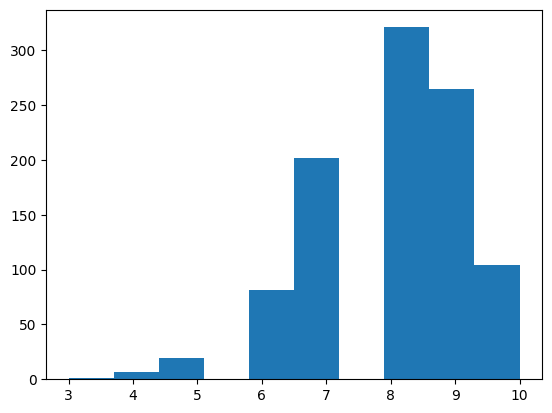

0.6241903615999999
0.10737418240000006


'\nNice job! Notice that we started out simple by just showing the general shape of the distribution, but quickly moved on to actual application. Remember, interviewers like to start out with fundamental concepts before getting incrementally more complex. By mastering the basics, you put yourself in a much better position right off the bat!\n'

In [21]:
# exercise 05

"""
Binomial distribution

As we touched on in the slides, the binomial distribution is used to model the number of successful outcomes in trials where there is some consistent probability of success.

For this exercise, consider a game where you are trying to make a ball in a basket. You are given 10 shots and you know that you have an 80% chance of making a given shot. To simplify things, assume each shot is an independent event.
"""

# Instructions

"""

    Generate some data for the distribution using the rvs() function with size set to 1000; assign it to the data variable.
    Display a matplotlib histogram; examine the shape of the distribution.
    Assign the probability of making 8 or less shots to prob1 and print the result.
    Assign the probability of making all 10 shots to prob2 and print the result.

"""

# solution

# Generate binomial data
from scipy.stats import binom
data = binom.rvs(n=10, p=0.8, size=1000)

# Plot the distribution
plt.hist(data)
plt.show()

# Assign and print probability of 8 or less successes
prob1 = binom.cdf(k=8, n=10, p=0.8)
print(prob1)

# Assign and print probability of all 10 successes
prob2 = binom.pmf(k=10, n=10, p=0.8)
print(prob2)

#----------------------------------#

# Conclusion

"""
Nice job! Notice that we started out simple by just showing the general shape of the distribution, but quickly moved on to actual application. Remember, interviewers like to start out with fundamental concepts before getting incrementally more complex. By mastering the basics, you put yourself in a much better position right off the bat!
"""

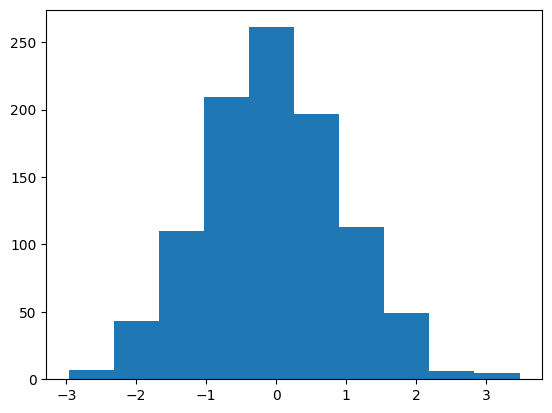

0.02275013194817921
0.019


"\nAll done! How close is the result from the true distribution vs. our sample distribution? Do these results make since in the context of the 68-95-99.7 rule discussed in the slides? Make sure to keep reviewing and going deeper on the topic of the normal distribution, as it's a favorite among interviewers. Congrats on finishing the first chapter and moving closer to acing your next interview!\n"

In [24]:
# exercise 06

"""
Normal distribution

On to the most recognizable and useful distribution of the bunch: the normal or Gaussian distribution. In the slides, we briefly touched on the bell-curve shape and how the normal distribution along with the central limit theorem enables us to perform hypothesis tests.

Similar to the previous exercises, here you'll start by simulating some data and examining the distribution, then dive a little deeper and examine the probability of certain observations taking place.
"""

# Instructions

"""

    Generate the data for the distribution by using the rvs() function with size set to 1000; assign it to the data variable.
    Display a matplotlib histogram; examine the shape of the distribution.
    Given a standardized normal distribution, what is the probability of an observation greater than 2?
    Looking at our sample, what is the probability of an observation greater than 2?


"""

# solution

# Generate normal data
from scipy.stats import norm
data = norm.rvs(size=1000)

# Plot distribution
plt.hist(data)
plt.show()

# Compute and print true probability for greater than 2
true_prob = 1 - norm.cdf(2)
print(true_prob)

# Compute and print sample probability for greater than 2
sample_prob = sum(obs > 2 for obs in data) / len(data)
print(sample_prob)

#----------------------------------#

# Conclusion

"""
All done! How close is the result from the true distribution vs. our sample distribution? Do these results make since in the context of the 68-95-99.7 rule discussed in the slides? Make sure to keep reviewing and going deeper on the topic of the normal distribution, as it's a favorite among interviewers. Congrats on finishing the first chapter and moving closer to acing your next interview!
"""